In [1]:
import matplotlib
import numpy as np
from scipy import stats
# matplotlib.use("macosx")
import matplotlib.pyplot as plt

In [6]:
#f = open("/Users/jeff/Research/Simcore/diffusion_len_10_2d.log",'r')
#f = open("/Users/jeff/Research/Simcore/diffusion_len_10_2d_2.log",'r')
f=open("/Users/jeff/Research/Simcore/rigid_diffusion_len_10_2d_1.log",'r')
#f = open("/Users/jeff/simcore/rigid-diffusion-2d-r1-diffusion.log")
line = f.readline()
line=line.split()
nFilaments=len(line)-1
time=[]
dat=[]
for i in xrange(nFilaments):
    dat.append([])
for line in f:
    line=line.split()
    time.append(float(line[0])*.001) # multiply times delta to get simtime
    for i in xrange(nFilaments):
        dat[i].append(np.cos(float(line[i+1])))
f.close()


1.41232392996
0.0272341324086
0.965079313917


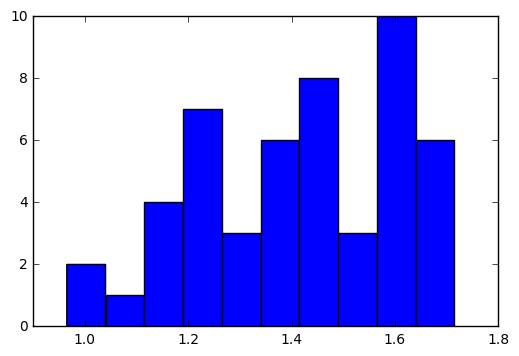

NameError: name 't' is not defined

In [7]:
length=10
means=[]
sems=[]
for n in xrange(nFilaments):
    diff=[]
    for i in xrange(1,len(dat[n])):
        diff.append(np.square(dat[n][i]-dat[n][0]))
    meanDiff=np.mean(diff)
    stdDiff=np.std(diff, ddof=1)
    means.append(meanDiff)
    sems.append(stdDiff)
print np.mean(means)
print stats.sem(means)
print stats.mode(means)[0][0]
plt.hist(means,bins=10)
plt.show()
#length=length/2.0
#dRot=9.0*np.log(length)/(length)**3
#length=length-1
#dRot2=np.square(length+1)*(length+1)/(9.0 * np.log(length) - 0.662 + 0.917 * 1.0/(length + 1) - 0.050 * 1.0/(length+1)**2)
#dRot2=1.0/dRot2

#print "theory: " + str(np.exp(-2*dRot*t))

In [13]:
f = open("/Users/jeff/Research/Simcore/rigid_diffusion_len_10_2d_1.log",'r')
line = f.readline()
line=line.split()
nFilaments=len(line)-1
time=[]
dat=[]
for i in xrange(nFilaments):
    dat.append([])
for line in f:
    line=line.split()
    time.append(float(line[0])*.001) # multiply times delta to get simtime
    for i in xrange(nFilaments):
        dat[i].append(np.cos(float(line[i+1])))
f.close()

In [26]:
length=10
dRot=9.0*np.log(length)/(length)**3
meanOrientation=[]
sems=[]
for i in xrange(len(dat[0])):
    meanOrientation.append([])
for j in xrange(1,5):
    #f = open("/Users/jeff/Research/Simcore/diffusion_len_10_2d_"+str(j)+".log",'r')
    f = open("/Users/jeff/Research/Simcore/rigid_diffusion_len_10_2d_"+str(j)+".log",'r')
    line = f.readline()
    line=line.split()
    nFilaments=len(line)-1
    time=[]
    dat=[]
    for i in xrange(nFilaments):
        dat.append([])
    for line in f:
        line=line.split()
        time.append(float(line[0])*.001) # multiply times delta to get simtime
        for i in xrange(nFilaments):
            dat[i].append(np.cos(float(line[i+1])))
    f.close()
    for i in xrange(len(dat[0])):
        for n in xrange(nFilaments):
            meanOrientation[i].append(dat[n][i])
for i in xrange(len(dat[0])):
    sems.append(stats.sem(meanOrientation[i]))
    meanOrientation[i] = np.mean(meanOrientation[i])
theory = lambda t: np.exp(-dRot*t)
tm = np.linspace(time[0],time[len(time)-1],1000)
#length=length/2.0
#dRot=9.0*np.log(length)/(length)**3
#length=length-1
#dRot2=np.square(length+1)*(length+1)/(9.0 * np.log(length) - 0.662 + 0.917 * 1.0/(length + 1) - 0.050 * 1.0/(length+1)**2)
#dRot2=1.0/dRot2

#print "theory: " + str(np.exp(-2*dRot*t))

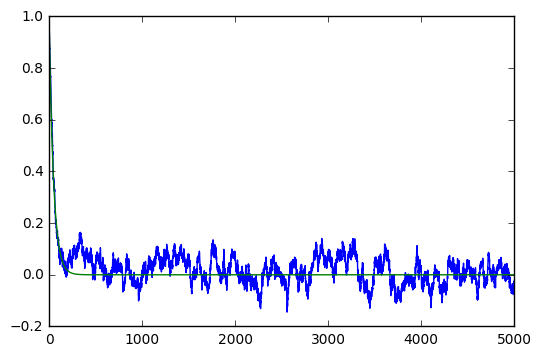

In [32]:
tm = np.linspace(time[0],time[len(time)-1],1000)
theory = lambda t: np.exp(-dRot*t)
#plt.errorbar(time,meanOrientation,yerr=sems)
plt.plot(time,meanOrientation)
plt.plot(tm, theory(tm))
#plt.xlim(0,200)
plt.show()

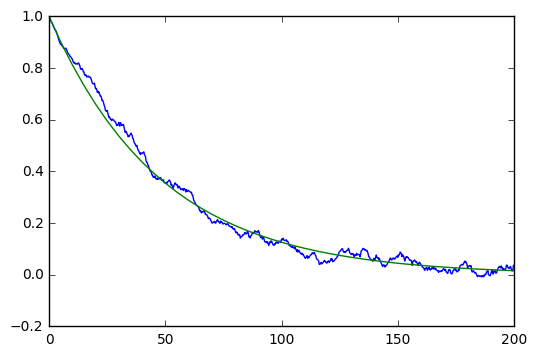

In [39]:
#plt.errorbar(time,meanOrientation,yerr=sems)
plt.plot(time,meanOrientation)
plt.plot(tm, theory(tm))
plt.xlim(0,200)
plt.show()

In [33]:
length=10
dRot=9.0*np.log(length)/(length)**3
meanOrientation=[]
sems=[]
for i in xrange(len(dat[0])):
    meanOrientation.append([])
for j in xrange(1,5):
    f = open("/Users/jeff/Research/Simcore/diffusion_len_10_2d_"+str(j)+".log",'r')
    #f = open("/Users/jeff/Research/Simcore/rigid_diffusion_len_10_2d_"+str(j)+".log",'r')
    line = f.readline()
    line=line.split()
    nFilaments=len(line)-1
    time=[]
    dat=[]
    for i in xrange(nFilaments):
        dat.append([])
    for line in f:
        line=line.split()
        time.append(float(line[0])*.0005) # multiply times delta to get simtime
        for i in xrange(nFilaments):
            dat[i].append(np.cos(float(line[i+1])))
    f.close()
    for i in xrange(len(dat[0])):
        for n in xrange(nFilaments):
            meanOrientation[i].append(dat[n][i])
for i in xrange(len(dat[0])):
    sems.append(stats.sem(meanOrientation[i]))
    meanOrientation[i] = np.mean(meanOrientation[i])
theory = lambda t: np.exp(-dRot*t)
tm = np.linspace(time[0],time[len(time)-1],1000)
#length=length/2.0
#dRot=9.0*np.log(length)/(length)**3
#length=length-1
#dRot2=np.square(length+1)*(length+1)/(9.0 * np.log(length) - 0.662 + 0.917 * 1.0/(length + 1) - 0.050 * 1.0/(length+1)**2)
#dRot2=1.0/dRot2

#print "theory: " + str(np.exp(-2*dRot*t))

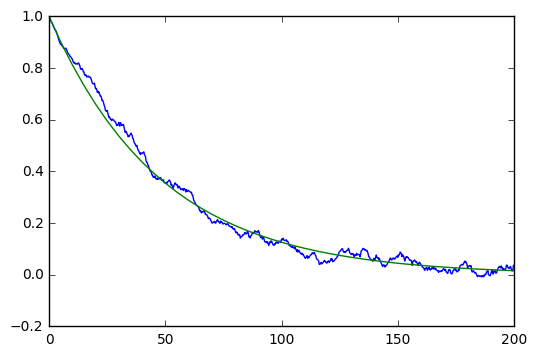

In [40]:
tm = np.linspace(time[0],time[len(time)-1],1000)
theory = lambda t: np.exp(-dRot*t)
#plt.errorbar(time,meanOrientation,yerr=sems)
plt.plot(time,meanOrientation)
plt.plot(tm, theory(tm))
plt.xlim(0,200)
plt.show()